# Buildmodel

Build nonlinear time series models from scalar time series data using minimum description length radila basis function formalism

## Sample data

First we generate some typical test data to play with

In [1]:
include("ChaosFunctions.jl")

addnoise (generic function with 1 method)

In [2]:
using Plots

In [3]:
z=lorenzpoints(5000,0.05)

3×5001 Array{Float64,2}:
 -9.3954   -9.11588  -8.65294  -8.14648  …   0.348011  -0.90338  -1.72562
 -9.09342  -8.3313   -7.63451  -7.18491     -2.88828   -2.83896  -3.19333
 28.5537   28.7701   28.4925   27.8354      24.9674    21.8964   19.3518

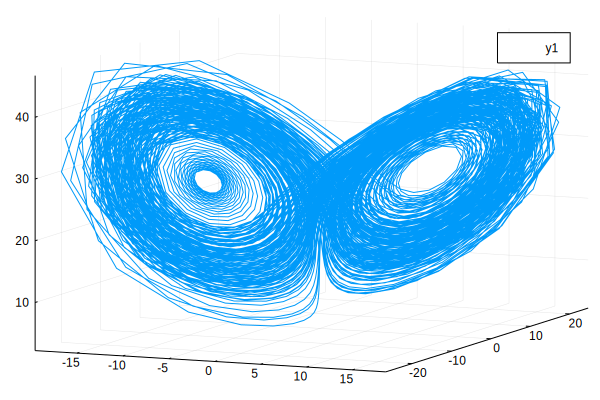

In [4]:
plot(z[1,:],z[2,:],z[3,:])

In [5]:
z=rosslerpoints(5000,0.2)

3×5001 Array{Float64,2}:
 -2.09051    -1.75877    -1.34197   …  -0.459284  -1.49662   -2.20517
 -1.45337    -1.90718    -2.303         3.23109    3.15526    2.90361
  0.0252208   0.0261013   0.027361      3.509      0.936751   0.227118

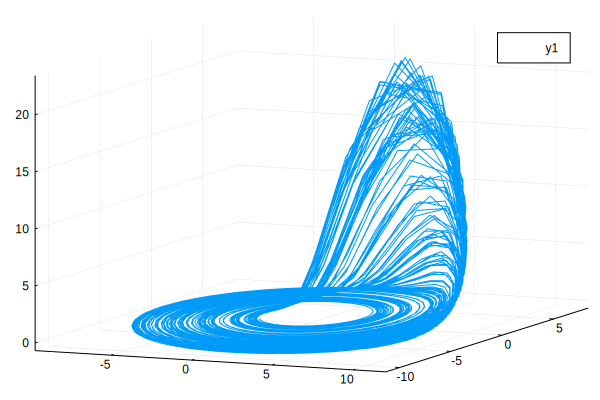

In [6]:
plot(z[1,:],z[2,:],z[3,:])

In [7]:
z=itmap(tinkerbell,-[0.7, 0.6],10000)

2×10000 Array{Float64,2}:
 -0.106024  -0.00524985   0.0848639  …  -0.0789416  -0.43416   -0.148745
 -0.407701  -0.329446    -0.171764      -0.978687   -0.492709  -0.686846

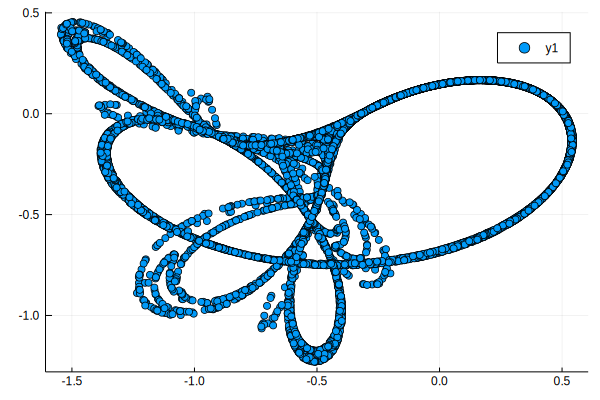

In [8]:
plot(z[2,:],z[1,:],linetype=:dots)

In [9]:
zn=addnoise(z,0.05)

2×10000 Array{Float64,2}:
 -0.115304  -0.0234071   0.0582706  …  -0.0899166  -0.464408  -0.132069
 -0.364493  -0.323686   -0.205541      -0.988503   -0.488164  -0.707568

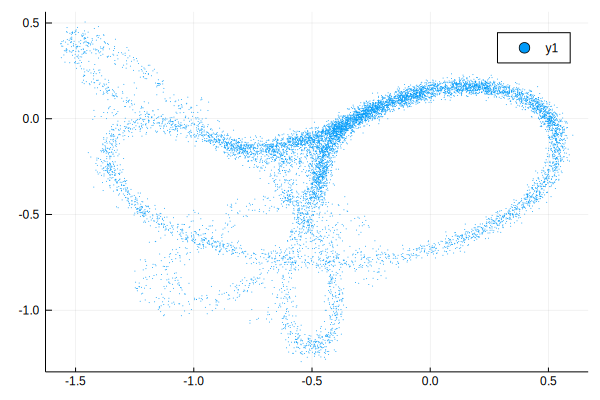

In [10]:
plot(zn[2,:],zn[1,:],linetype=:dots,markersize=0.1)

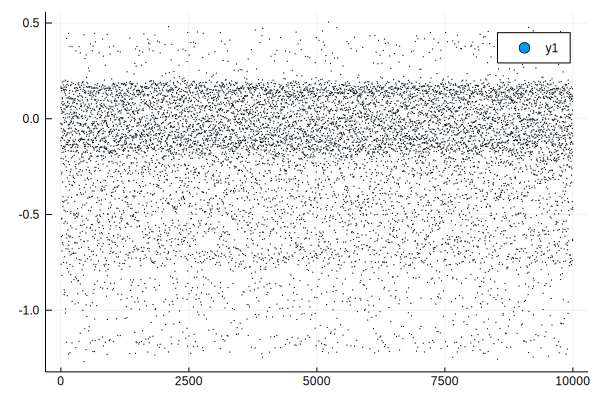

In [11]:
plot(zn[1,:],linetype=:dots,markersize=0.5)

In [12]:
z=itmap(logistic,1/π,10^4);

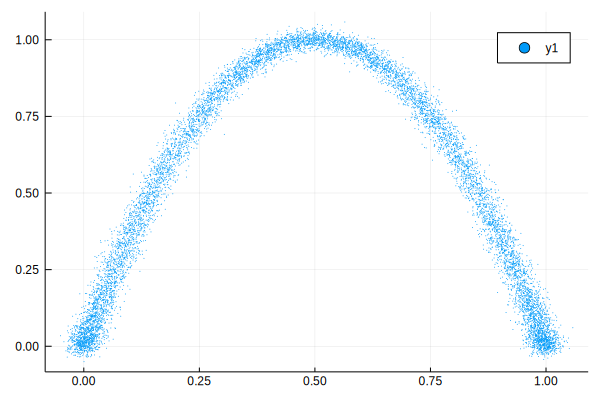

In [13]:
z=itmap(logistic,1/π,10^4);
zn=addnoise(z,0.05)
plot(zn[1:end-1],zn[2:end],linetype=:dots,markersize=0.1)

## Build the model

Import the modelling code, and away we go.

In [14]:
include("BasisFunctionTypes.jl")
include("Place.jl")

Main.Place

Any valid inline function can be used as a penlaty function (it must operate on globally defined functions in `Place.topdown` and must return a scalar, the algorithm seeks a minimum of this function. Four useful examples follow (description length ala `Rissanen` requires extra computation in the main code to account for parameter precisions.

In [15]:
#need to make these variables in scope of the current WS
nx=Int64(length(z))
mss=Float64(Inf)
λ=Array{Float64,1}[]
δ=Array{Float64,1}[]
#valid penalty criteria
Schwarz = :(nx*log(mss)+nk*log(nx))
Akaike = :(nx*log(mss)+2*nk)
Rissanen = :(description(mss,λ,δ,nx)) #Rissanen desciption length
Model30 = :(-nk*(nk<=30))
#nx is # of observation (length of data)
#nk is # of parameters (basis functions in model)
#mss is the mean-sum-square model prediction error
#λ are the model parameters and δ their precisions

:(-nk * (nk <= 30))

Next, the dictionary `options` defined model structure and optional modelling parameters (it'll run a produce something even if `options` is empty, but it might be better to populate this somewhat intelligently. A useful example to model the (admittedly rather simple) logistic map is provided

In [16]:
options=Dict("stopstep"=>10,
    "testdatum"=> 8000,
    "functions"=> (gaussian,tophat),
    "embedding" => Place.vembed([0,1,2,3]),
 #   "embedding" => ([0, 1], [0, 1, 2, 3]),
    "penalty"=> Rissanen,
    "nneighbours"=> 1
    )

Dict{String,Any} with 6 entries:
  "penalty"     => :(description(mss, λ, δ, nx))
  "stopstep"    => 10
  "embedding"   => ([0], [1], [0, 1], [2], [0, 2], [1, 2], [0, 1, 2], [3], [0, …
  "testdatum"   => 8000
  "functions"   => (gaussian, tophat)
  "nneighbours" => 1

And, then, away we go...

In [17]:
mymodel, X, zout, mdlv = Place.buildmodel(zn,options)

dx=4, nx=7999
needδ=true
*MSS=0.12414895375122982 DL=3010.5301431972835 size=1
*MSS=0.04961150921625682 DL=-657.128708912273 size=1
WARNING Qδ=1/δ has no exact solution in 2-D case - giving up
*MSS=0.020826141675716045 DL=-4123.73933075697 size=2
WARNING Qδ=1/δ has no exact solution in 2-D case - giving up
*MSS=0.008929738329615302 DL=-7511.129904247016 size=2
WARNING Qδ=1/δ has no exact solution in 2-D case - giving up
*MSS=0.0036967880119246027 DL=-11037.853643100794 size=2
*MSS=0.00292897320840689 DL=-11957.807374690225 size=3
*MSS=0.00289587830679418 DL=-11996.211603208714 size=4
*MSS=0.002872081055631474 DL=-12022.931577038353 size=5
*MSS=0.00269891148807636 DL=-12270.724311045298 size=5
*MSS=0.0026858898667786336 DL=-12283.685873527047 size=6
*MSS=0.002620102289315618 DL=-12382.657754556898 size=6
*MSS=0.002613176146792648 DL=-12386.605527842314 size=7
MSS=0.0026158521067663736 DL=-12382.510464373816 size=7
*MSS=0.002604140746566967 DL=-12394.023873466704 size=8
*MSS=0.0026020680

(Main.Place.PlaceModel(Main.Place.BasisFunc[Main.Place.BasisFunc(tophat, [0], 0.42163040012422437, [0.5337038004164085 0.2560812085687103 … 0.7621222710578296 0.6369992898071283], [3.9572199149256164]), Main.Place.BasisFunc(tophat, [0], 0.20130612644001045, [0.5337038004164085 0.2560812085687103 … 0.7621222710578296 0.6369992898071283], [3.399881225532806]), Main.Place.BasisFunc(tophat, [0], 0.2892690008397501, [0.5337038004164085 0.2560812085687103 … 0.7621222710578296 0.6369992898071283], [4.877329906752935]), Main.Place.BasisFunc(tophat, [1], 0.693253758291745, [0.14815020822433178 0.07173692742495857 … 0.2925404412655207 0.207391678039916], [3.6689912879913766]), Main.Place.BasisFunc(gaussian, [1], 0.0801099772420044, [0.14815020822433178 0.07173692742495857 … 0.2925404412655207 0.207391678039916], Any[]), Main.Place.BasisFunc(tophat, [2], 0.08223707392549973, [0.96126928976334 0.03484766557293772 … 0.04111877902948838 0.06758639872029276], [3.971744533394121]), Main.Place.BasisFun

Modelling done, we can make one-step predictions on time series data

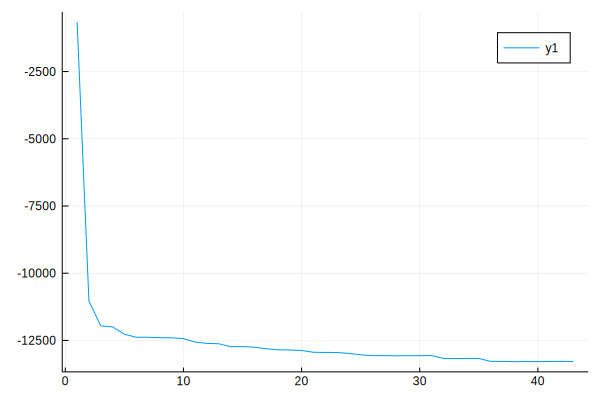

In [18]:
plot(mdlv)

In [19]:
yp,yt,ep = Place.predict(mymodel, z);

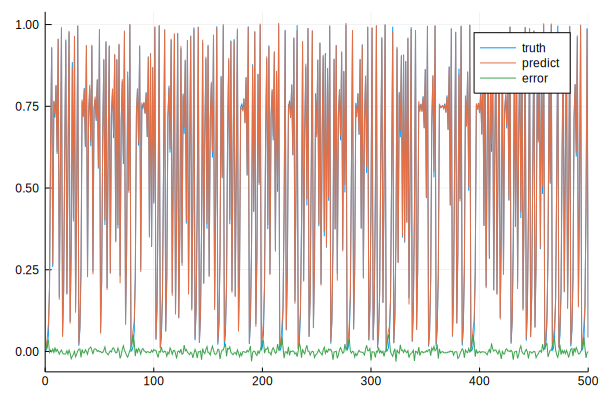

In [20]:
plot(yt,label="truth")
plot!(yp,label="predict")
plot!(ep,label="error",xlimit=(0,500))

Or, free run simulations

In [21]:
yp, yt = Place.freerun(mymodel,zn,500)

([-0.018293642543168395, -0.00913131005464718, 0.016300824760632722, 0.08090827311567761, 0.2713002644904145, 0.7931530723075748, 0.6561850279810448, 0.9003723908495227, 0.36039699743456, 0.9185782606543971  …  0.8994947593575899, 0.3852453171125414, 0.942558024727786, 0.20695657854286073, 0.6475574466745562, 0.9150296628045018, 0.32902289135932206, 0.8736651656100315, 0.4507497384293659, 0.9977747761984995], [0.000856595130839377, 0.02465129147720287, 0.03675944760541753, 0.2255507468879157, 0.6324678013431247, 0.9150105317022665, 0.24549866419929545, 0.7677232094674343, 0.7265914484693182, 0.8091147161772336  …  0.15935121657545348, 0.4627176603085811, 1.008374715890936, 0.0183539436819227, 0.015679775432868043, 0.04280248356904722, 0.11140417139725561, 0.45960006589344776, 1.0079864375415768, 0.030572677900220127])

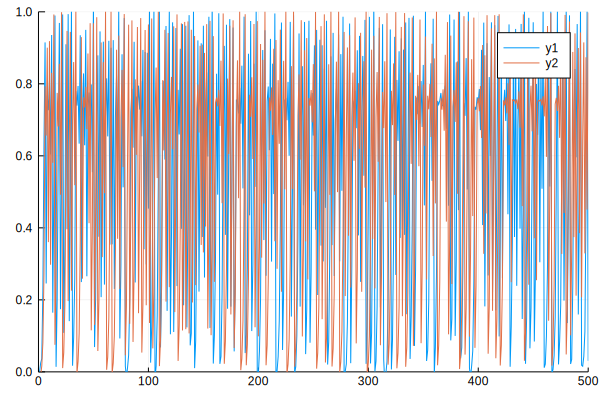

In [22]:
plot(yt)
plot!(yp,ylimit=(0,1),xlimit=(0,500))


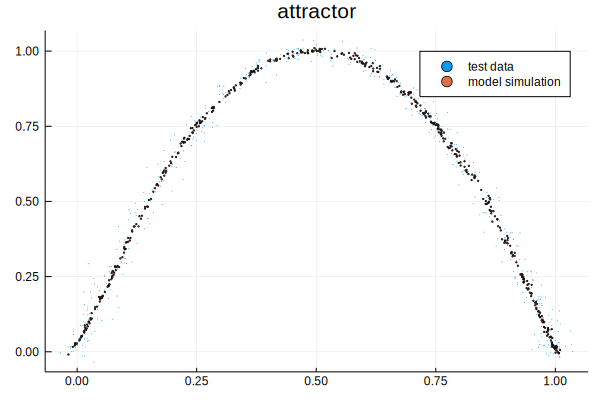

In [23]:
plot(yt[1:end-1],yt[2:end],linetype=:dots,markersize=0.1,label="test data")
plot!(yp[1:end-1],yp[2:end],linetype=:dots,markersize=1,label="model simulation",title="attractor")

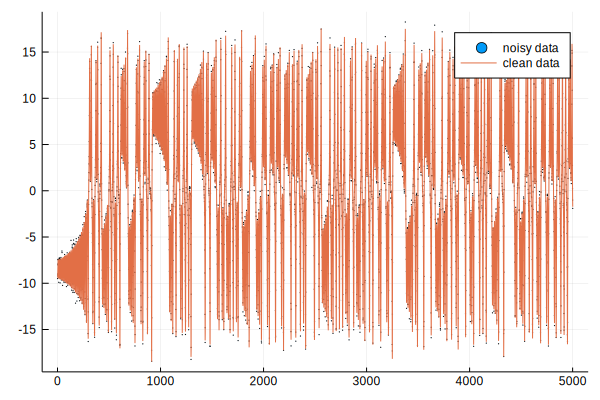

In [24]:
z=lorenzpoints(5000,0.05)
y=z[1,:]
yn=addnoise(y,0.05)
plot(yn,linetype=:dots,markersize=0.5,label="noisy data")
plot!(y,label="clean data")

In [25]:
options=Dict("stopstep"=>10,
    "testdatum"=> 8000,
    "functions"=> (gaussian,tophat),
    "embedding" => Place.vembed([0,1,2,3,6,12]),
 #   "embedding" => ([0, 1], [0, 1, 2, 3]),
    "penalty"=> Rissanen,
    "nneighbours"=> 1
    )

Dict{String,Any} with 6 entries:
  "penalty"     => :(description(mss, λ, δ, nx))
  "stopstep"    => 10
  "embedding"   => ([0], [1], [0, 1], [2], [0, 2], [1, 2], [0, 1, 2], [3], [0, …
  "testdatum"   => 8000
  "functions"   => (gaussian, tophat)
  "nneighbours" => 1

In [26]:
mymodel, X, zout, mdlv = Place.buildmodel(yn,options)

dx=13, nx=4488
needδ=true
*MSS=4.601450064908903 DL=9797.364694082258 size=1
WARNING Qδ=1/δ has no exact solution in 2-D case - giving up
*MSS=3.0470897537297983 DL=8877.433335711741 size=2
*MSS=2.716947176641692 DL=8625.768506527753 size=3
*MSS=2.659166236987703 DL=8582.83033469557 size=4
*MSS=2.6163148528296283 DL=8552.047410685002 size=5
*MSS=1.5696596915331018 DL=7407.549383624366 size=5
*MSS=1.4704646941791253 DL=7259.164922832836 size=5
*MSS=1.4626827699607023 DL=7253.281488550715 size=6
*MSS=1.3673052669566605 DL=7101.204401163151 size=6
*MSS=1.356911147673285 DL=7090.074715009247 size=7
*MSS=1.350794051830918 DL=7079.625344310019 size=7
*MSS=1.3022245496810607 DL=6995.136827342821 size=7
*MSS=1.2921558201858225 DL=6984.1533312873935 size=8
*MSS=1.2906764728786397 DL=6981.057799105419 size=8
MSS=1.2897727285993088 DL=6986.351795245157 size=9
*MSS=1.0637589064532507 DL=6553.611770409067 size=9
*MSS=1.0583023450610956 DL=6542.650411826818 size=9
*MSS=1.0477277447324336 DL=6526.260

(Main.Place.PlaceModel(Main.Place.BasisFunc[Main.Place.BasisFunc(tophat, [3], 2.639069610272442, [-4.785594655600833 -8.06973880380153 … 10.324649521799838 -5.766262686234804], [4.803149615841061]), Main.Place.BasisFunc(tophat, [0, 1], 8.538502192582573, [-10.5384362920916 -18.429187044328764 … 4.54096864677519 -8.08897234401874; -8.904424110051007 -17.243599693334474 … 6.104197149291401 -6.925680042611221], [2.139229090707402]), Main.Place.BasisFunc(gaussian, [2], 3.0024275791791757, [-6.565942342568616 -11.48772512548291 … 8.280925413339904 -6.216623597414573], Any[]), Main.Place.BasisFunc(tophat, [3, 6], 10.82845797044809, [-4.785594655600833 -8.06973880380153 … 10.324649521799838 -5.766262686234804; -4.052545818023304 -2.035476370300514 … 11.096548123068303 -7.468419165398796], [3.2610376173861217]), Main.Place.BasisFunc(tophat, [1, 2, 6], 14.425922398705168, [-8.904424110051007 -17.243599693334474 … 6.104197149291401 -6.925680042611221; -6.565942342568616 -11.48772512548291 … 8.28

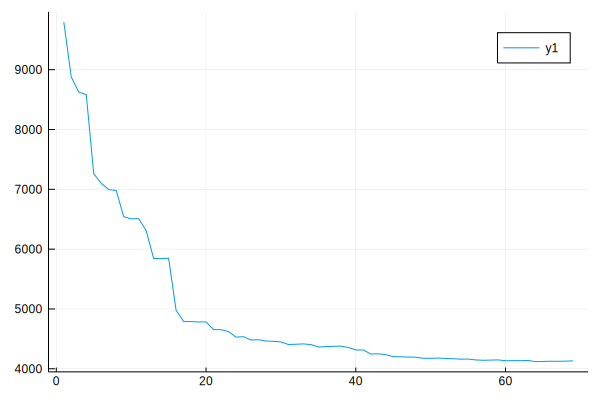

In [27]:
plot(mdlv)

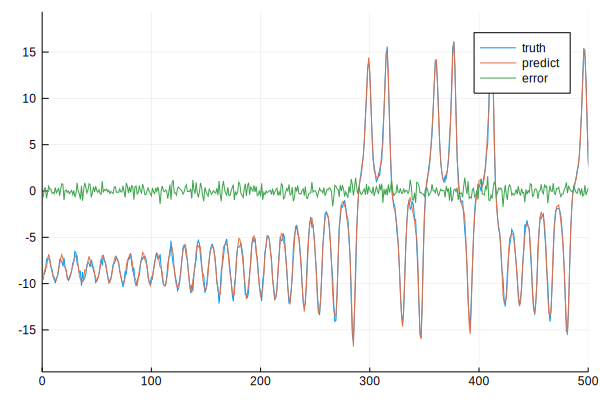

In [28]:
yp,yt,ep = Place.predict(mymodel, yn);
plot(yt,label="truth")
plot!(yp,label="predict")
plot!(ep,label="error",xlimit=(0,500))

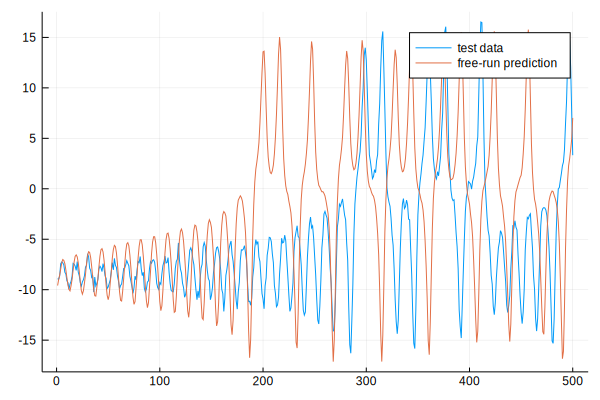

In [29]:
yp, yt = Place.freerun(mymodel,yn,500)
plot(yt,label="test data")
plot!(yp,label="free-run prediction")

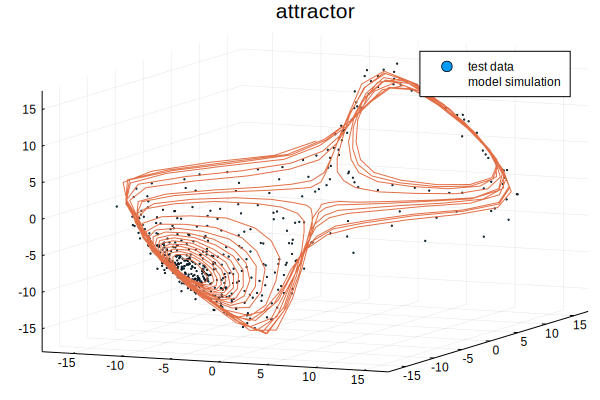

In [30]:
plot(yt[1:end-6],yt[4:end-3],yt[7:end],linetype=:dots,markersize=1,label="test data")
plot!(yp[1:end-6],yp[4:end-3],yp[7:end],label="model simulation",title="attractor")

## Michael Small

Last updated 12/7

In [31]:
size(yn)

(5001,)

In [32]:
yn

5001-element Array{Float64,1}:
 -9.49304706808666
 -9.00795996172415
 -9.202552228687424
 -7.919152375148105
 -7.432941300305965
 -8.0125158380097
 -7.47802349056355
 -7.398421428071266
 -8.060716990138236
 -7.795649691134178
 -9.127861742252618
 -9.899878066396282
 -9.360050387945721
  ⋮
  4.704868286443638
  5.772941516566233
  9.360211952282713
 13.493573825878475
 15.174193806556147
 14.880096926347816
 10.868805272302662
  5.681797592089115
  2.7406097432153373
  0.22018770371194482
 -1.0035366234095535
 -1.9059121331673528